# Homework 3: Comparison of the Results of Different Classifiers

## Part 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from datetime import datetime
from sklearn.metrics import *
import matplotlib.pyplot as plt
import hw3_pipeline as pipe
%matplotlib inline

## Part 2. Import Data and Basic Explorations

Create the column 'over_60_days', which indicates that if the different between 'date_posted' and 'date_fullyfunded' is over 60 days

In [2]:
data = pipe.read_data('projects_2012_2013.csv')
data['date_posted'] = data['date_posted'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
data['datefullyfunded'] = data['datefullyfunded'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
data['over_60_days'] = data['datefullyfunded'] - data['date_posted']
data['over_60_days'] = data['over_60_days'].apply(lambda x: x.days)
data['over_60_days'] = data.apply(lambda row: pipe.label_to_dummy(row['over_60_days'], 60), axis=1)

In [3]:
data.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_metro', 'school_district', 'school_county', 'school_charter',
       'school_magnet', 'teacher_prefix', 'primary_focus_subject',
       'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area',
       'resource_type', 'poverty_level', 'grade_level',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'date_posted', 'datefullyfunded',
       'over_60_days'],
      dtype='object')

View the summary of the column 'over_60_days'

In [4]:
data['over_60_days'].value_counts()

0    88966
1    36010
Name: over_60_days, dtype: int64

Since we are interested in the fields 'poverty_level' and 'total_price_including_optional_support', we are looking at the summary of these two columns

In [5]:
data['poverty_level'].value_counts()

highest poverty     67752
high poverty        34361
moderate poverty    19066
low poverty          3797
Name: poverty_level, dtype: int64

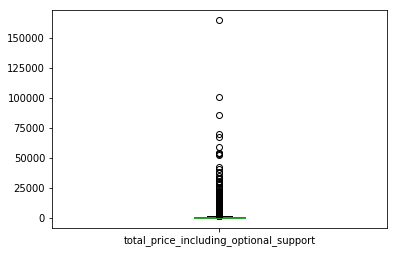

In [6]:
pipe.boxplot(data, 'total_price_including_optional_support')

Convert the field "poverty_level" to dummy variables, as well as discretizing the column "total_price_including_optional_support" into different categories

In [7]:
interested_cols = ['poverty_level', 'total_price_including_optional_support','date_posted', 'datefullyfunded', 'over_60_days']
to_dummies = ['poverty_level']
to_discretize = ['total_price_including_optional_support']
data_select = data[interested_cols]
pipe.discretize_col(data_select, to_discretize)
data_select = pipe.to_dummy(data_select, to_dummies)

C:\Users\peter\Desktop\MLHW3\hw3_pipeline.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[column].max()], labels=[0,1,2], include_lowest=True)


## Part 3. Create Machine Learning Models

Generate features and label, as well as splitting the training and testing datasets based 'date_posted' column

In [8]:
features = ['total_price_including_optional_support', 'poverty_level_highest poverty', 'poverty_level_high poverty',
           'poverty_level_moderate poverty', 'poverty_level_low poverty']
label = ['over_60_days']
test_1 = pipe.slice_time_data(data_select, '2012-07-01', '2012-12-31')
test_2 = pipe.slice_time_data(data_select, '2013-01-01', '2013-06-30')
test_3 = pipe.slice_time_data(data_select, '2013-07-01', '2013-12-31')
train_1 = pipe.slice_time_data(data_select, '2012-01-01', '2012-06-30')
train_2 = pipe.slice_time_data(data_select, '2012-01-01', '2012-12-31')
train_3 = pipe.slice_time_data(data_select, '2012-01-01', '2013-06-30')
X_train_1 = train_1[features].values
y_train_1 = train_1[label[0]].values
X_test_1 = test_1[features].values
y_test_1 = test_1[label[0]].values
X_train_2 = train_2[features].values
y_train_2 = train_2[label[0]].values
X_test_2 = test_2[features].values
y_test_2 = test_2[label[0]].values
X_train_3 = train_3[features].values
y_train_3 = train_3[label[0]].values
X_test_3 = test_3[features].values
y_test_3 = test_3[label[0]].values

Call the models from the pipeline

In [9]:
models= pipe.define_clfs_params()

In [10]:
models_to_run = []
for key, val in models.items():
    models_to_run.append(key)
models_to_run

['BG_N_Estimators_10',
 'BG_N_Estimators_100',
 'RF_N_Estimators_10',
 'RF_N_Estimators_100',
 'LR_l1',
 'LR_l2',
 'SVM_C_l1',
 'SVM_C_l2',
 'GB_N_Estimators_10',
 'GB_N_Estimators_100',
 'DT_GINI',
 'DT_ENTROPY',
 'KNN_N_10',
 'KNN_N_100']

## Part 4. Run Models

Fit and evaluate the models of the first testing dataset (training data: first half of 2012; testing data: second half of 2012)

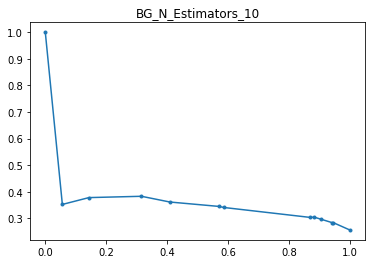

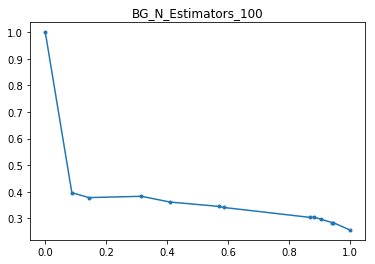

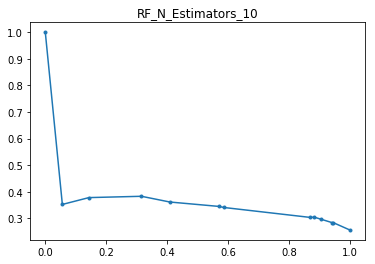

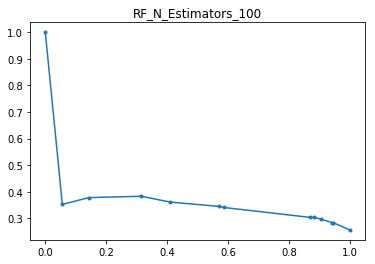

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


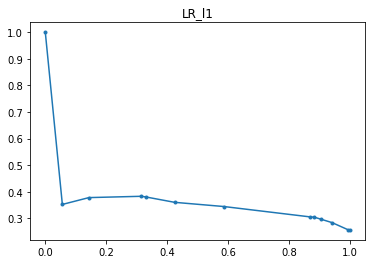

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


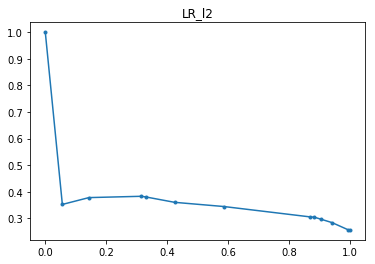

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


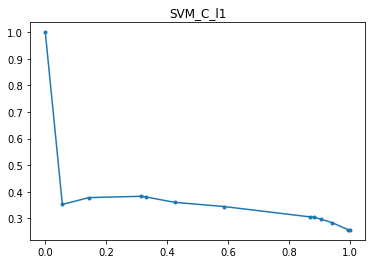

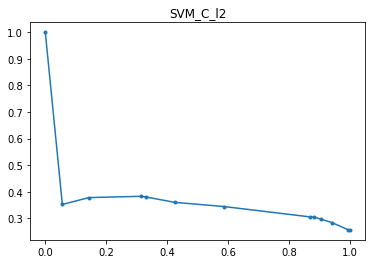

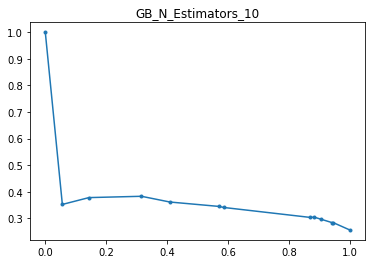

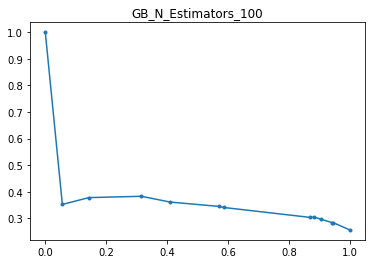

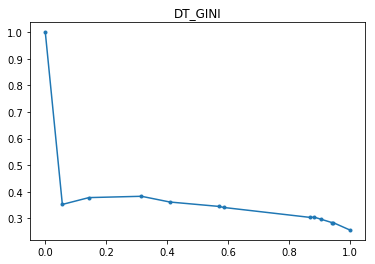

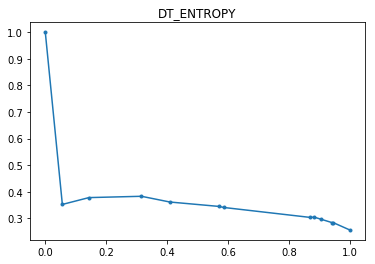

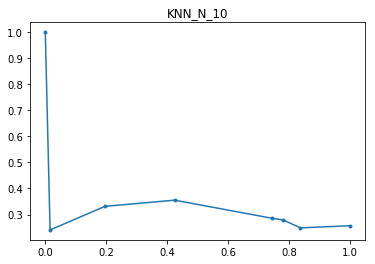

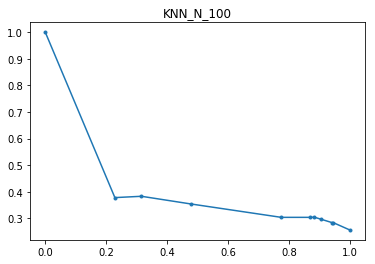

,model_type,accuracy,auc-roc,p_at_5,p_at_10,p_at_20,r_at_5,r_at_10,r_at_20,f1_at_5,f1_at_10,f1_at_20
0,BG_N_Estimators_10,0.743072,0.636252,0.288239,0.368261,0.347190,0.056063,0.143297,0.270238,0.093868,0.206314,0.303919
1,BG_N_Estimators_100,0.743072,0.636786,0.318708,0.368261,0.347190,0.061989,0.143297,0.270238,0.103790,0.206314,0.303919
2,RF_N_Estimators_10,0.743072,0.636252,0.288239,0.368261,0.347190,0.056063,0.143297,0.270238,0.093868,0.206314,0.303919
3,RF_N_Estimators_100,0.743072,0.636252,0.288239,0.368261,0.347190,0.056063,0.143297,0.270238,0.093868,0.206314,0.303919
4,LR_l1,0.731043,0.637947,0.288239,0.368261,0.347190,0.056063,0.143297,0.270238,0.093868,0.206314,0.303919
5,LR_l2,0.731043,0.637947,0.288239,0.368261,0.347190,0.056063,0.143297,0.270238,0.093868,0.206314,0.303919
6,SVM_C_l1,0.743072,0.637947,0.288239,0.368261,0.347190,0.056063,0.143297,0.270238,0.093868,0.206314,0.303919
7,SVM_C_l2,0.743072,0.637947,0.288239,0.368261,0.347190,0.056063,0.143297,0.270238,0.093868,0.206314,0.303919
8,GB_N_Estimators_10,0.743072,0.636252,0.288239,0.368261,0.347190,0.056063,0.143297,0.270238,0.093868,0.206314,0.303919
9,GB_N_Estimators_100,0.743072,0.636252,0.288239,0.368261,0.347190,0.056063,0.143297,0.270238,0.093868,0.206314,0.303919


In [11]:
pipe.clf_loop(models, models_to_run, X_train_1, X_test_1, y_train_1, y_test_1)

Fit and evaluate the models of the second testing dataset (training data: data of full year 2012; testing data: first half of 2013)

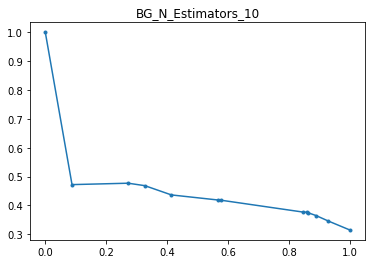

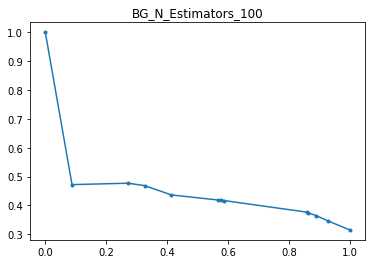

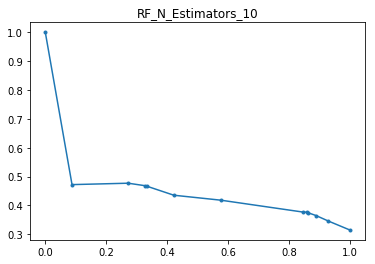

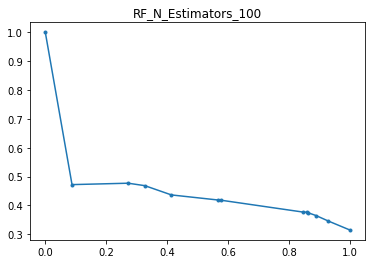

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


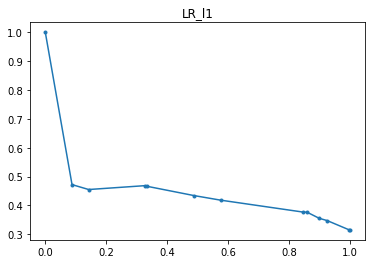

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


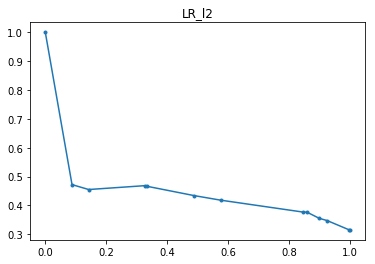

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


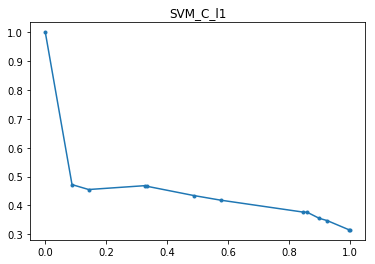

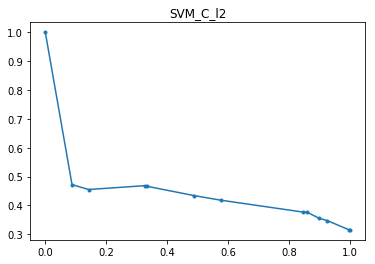

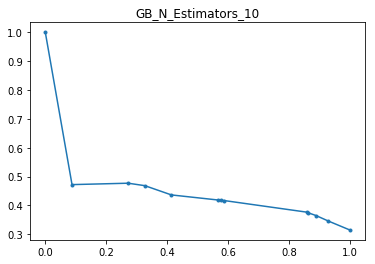

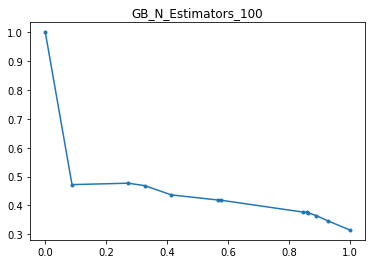

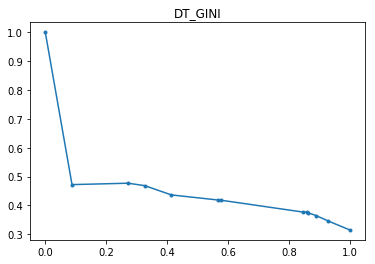

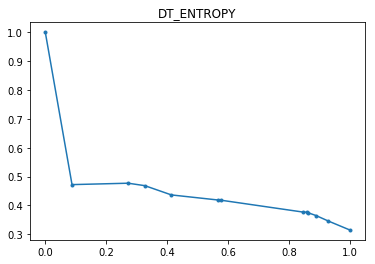

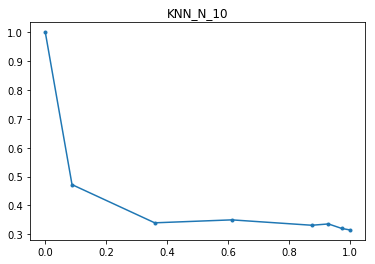

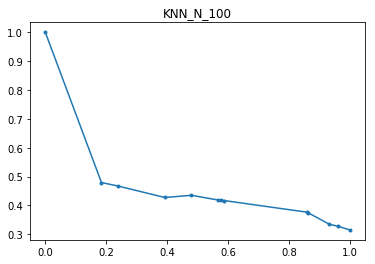

,model_type,accuracy,auc-roc,p_at_5,p_at_10,p_at_20,r_at_5,r_at_10,r_at_20,f1_at_5,f1_at_10,f1_at_20
0,BG_N_Estimators_10,0.685059,0.644830,0.380908,0.276645,0.429002,0.060459,0.087820,0.272433,0.104354,0.133318,0.333243
1,BG_N_Estimators_100,0.685059,0.645474,0.380908,0.276645,0.429002,0.060459,0.087820,0.272433,0.104354,0.133318,0.333243
2,RF_N_Estimators_10,0.685059,0.644966,0.380908,0.276645,0.429002,0.060459,0.087820,0.272433,0.104354,0.133318,0.333243
3,RF_N_Estimators_100,0.685059,0.644830,0.380908,0.276645,0.429002,0.060459,0.087820,0.272433,0.104354,0.133318,0.333243
4,LR_l1,0.685059,0.644681,0.380908,0.449027,0.420431,0.060459,0.142542,0.266990,0.104354,0.216391,0.326586
5,LR_l2,0.685059,0.644681,0.380908,0.449027,0.420431,0.060459,0.142542,0.266990,0.104354,0.216391,0.326586
6,SVM_C_l1,0.685059,0.644681,0.380908,0.449027,0.420431,0.060459,0.142542,0.266990,0.104354,0.216391,0.326586
7,SVM_C_l2,0.685059,0.644681,0.380908,0.449027,0.420431,0.060459,0.142542,0.266990,0.104354,0.216391,0.326586
8,GB_N_Estimators_10,0.685059,0.645474,0.380908,0.276645,0.429002,0.060459,0.087820,0.272433,0.104354,0.133318,0.333243
9,GB_N_Estimators_100,0.685059,0.644830,0.380908,0.276645,0.429002,0.060459,0.087820,0.272433,0.104354,0.133318,0.333243


In [12]:
pipe.clf_loop(models, models_to_run, X_train_2, X_test_2, y_train_2, y_test_2)

Fit and evaluate the models of the third testing dataset (training data: data of full year 2012 plus the first half year of 2013; testing data: second half of 2013)

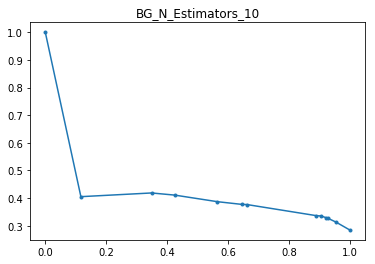

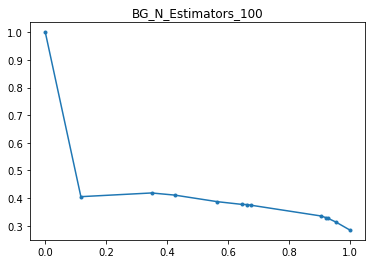

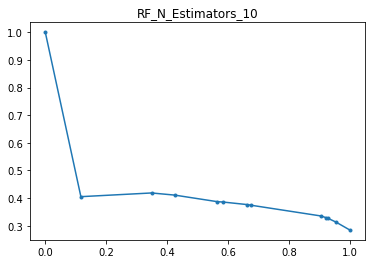

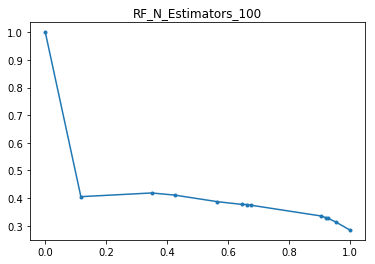

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


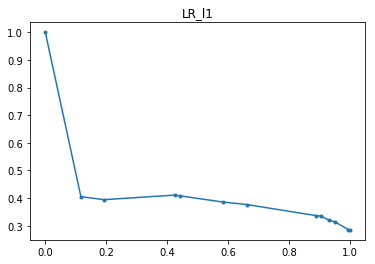

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


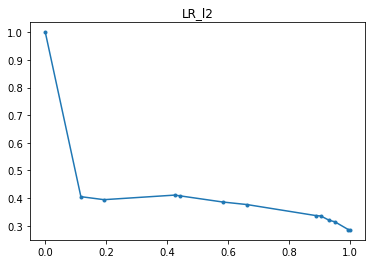

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


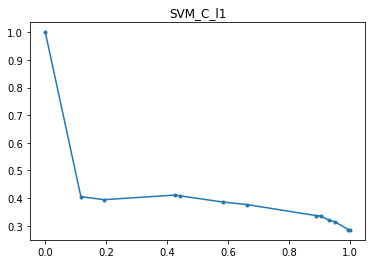

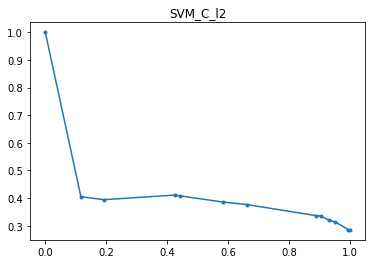

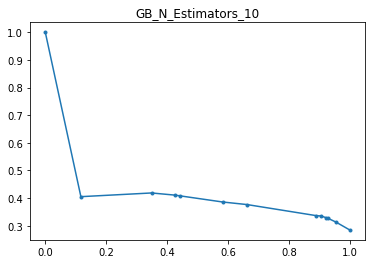

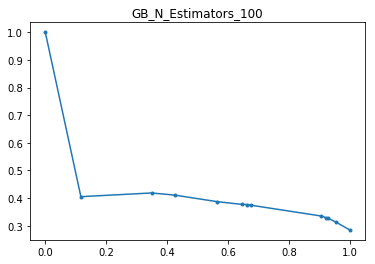

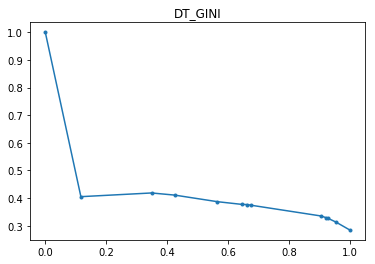

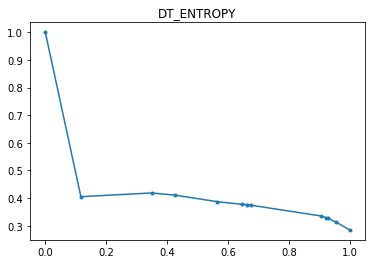

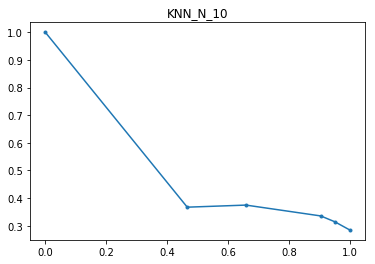

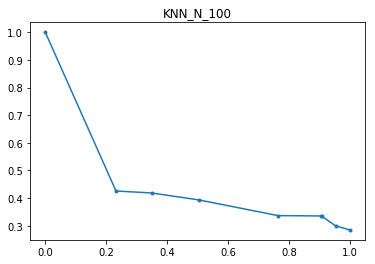

,model_type,accuracy,auc-roc,p_at_5,p_at_10,p_at_20,r_at_5,r_at_10,r_at_20,f1_at_5,f1_at_10,f1_at_20
0,BG_N_Estimators_10,0.715353,0.648950,0.177536,0.332880,0.366693,0.03118,0.116927,0.257636,0.053045,0.173063,0.302640
1,BG_N_Estimators_100,0.715353,0.649432,0.177536,0.332880,0.366693,0.03118,0.116927,0.257636,0.053045,0.173063,0.302640
2,RF_N_Estimators_10,0.715353,0.649586,0.177536,0.332880,0.366693,0.03118,0.116927,0.257636,0.053045,0.173063,0.302640
3,RF_N_Estimators_100,0.715353,0.649432,0.177536,0.332880,0.366693,0.03118,0.116927,0.257636,0.053045,0.173063,0.302640
4,LR_l1,0.715353,0.646474,0.177536,0.332880,0.274652,0.03118,0.116927,0.192969,0.053045,0.173063,0.226676
5,LR_l2,0.715353,0.646474,0.177536,0.332880,0.274652,0.03118,0.116927,0.192969,0.053045,0.173063,0.226676
6,SVM_C_l1,0.715353,0.646474,0.177536,0.332880,0.274652,0.03118,0.116927,0.192969,0.053045,0.173063,0.226676
7,SVM_C_l2,0.715353,0.646474,0.177536,0.332880,0.274652,0.03118,0.116927,0.192969,0.053045,0.173063,0.226676
8,GB_N_Estimators_10,0.715353,0.649294,0.177536,0.332880,0.366693,0.03118,0.116927,0.257636,0.053045,0.173063,0.302640
9,GB_N_Estimators_100,0.715353,0.649432,0.177536,0.332880,0.366693,0.03118,0.116927,0.257636,0.053045,0.173063,0.302640


In [13]:
pipe.clf_loop(models, models_to_run, X_train_3, X_test_3, y_train_3, y_test_3)